In [70]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
from scipy.optimize import curve_fit
from mpl_toolkits.basemap import Basemap

In [71]:
datadir = 'C:/Users/khana/Documents/Masters/Semester 2/Earth and System Modelling/PLASIM/PLASIM Data/'
preind = xr.open_dataset(datadir + 'spinup_T21.nc')
lsg_preind = xr.open_dataset(datadir + 'spinup_T42.nc')
idk = xr.open_dataset(datadir + 'spinup0-95.nc')
datadir = 'C:/Users/khana/Documents/Masters/Semester 2/Earth and System Modelling/PLASIM/PLASIM Data/'
era5_jan = xr.open_dataset(datadir + 'ERA5_jan.nc')
era5_jul = xr.open_dataset(datadir + 'ERA5_jul.nc')
pla_jan = xr.open_dataset(datadir + 'PLASIM_jan.nc')
pla_jul = xr.open_dataset(datadir + 'PLASIM_jul.nc')

In [78]:
era5_jan

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    t2m        (latitude, longitude) float32 ...
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    si10       (latitude, longitude) float32 ...
    tp         (latitude, longitude) float32 ...
    msl        (latitude, longitude) float32 ...

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

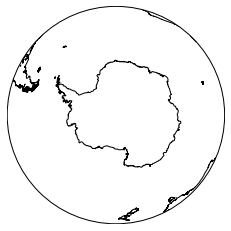

In [31]:
m = Basemap(projection='nsper',lon_0=0,lat_0=-90,
        satellite_height=10000000.,resolution='l')
m.drawcoastlines()
m.contour(lon,lat,idk.sic.mean('time'))

plt.title("Pic", fontsize=10)
plt.show()

In [41]:
idk

<xarray.Dataset>
Dimensions:  (lat: 64, lev: 10, lon: 128, time: 1140)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
  * lev      (lev) float64 0.0383 0.1191 0.2109 0.3169 ... 0.8233 0.9241 0.9833
  * time     (time) object 0000-01-01 00:00:00 ... 0094-12-01 00:00:00
Data variables: (12/14)
    ta       (time, lev, lat, lon) float32 ...
    ts       (time, lat, lon) float32 221.9 221.9 221.8 ... 242.8 242.3 241.9
    mrso     (time, lat, lon) float32 ...
    prl      (time, lat, lon) float32 ...
    prc      (time, lat, lon) float32 ...
    prsn     (time, lat, lon) float32 ...
    ...       ...
    rst      (time, lat, lon) float32 ...
    rlut     (time, lat, lon) float32 ...
    evap     (time, lat, lon) float32 ...
    sic      (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sit      (time, lat, lon) float32 ...
    vegf     (time, lat, lon) float32 ...
Attributes:
    title:        PUMA/PLASIM DATA
    history:      Created by PumaBurner 7.4
    Conventions:  CF-1.0

In [26]:
data=idk.sic.mean('time')

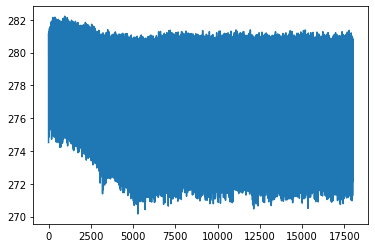

In [11]:
plt.plot(np.arange(0,18000,1), preind.ts.mean('lat').mean('lon'))

In [12]:
mean_GMST = np.sum(preind.ts.mean('lat').mean('lon'))/len(preind.ts.mean('lat').mean('lon'))

In [13]:
mean_GMST

<xarray.DataArray 'ts' ()>
array(276.75772222)

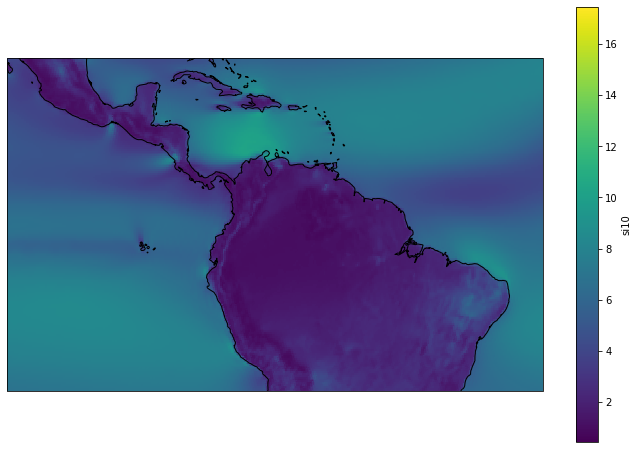

In [83]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

ax.coastlines(resolution='50m')
ax.set_extent([-30,-110,25, -20], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
era5_jul.si10.plot(ax=ax, transform=ccrs.PlateCarree());